Load and pre process **data**

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import kagglehub

from google.colab import drive

# Mount drive
drive.mount('/content/drive')

dataset_path = "/content/drive/MyDrive/Animals10/"


print("Classes:", os.listdir(dataset_path))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Classes: ['horse', 'dog', 'squirrel', 'elephant', 'cat', 'cow', 'sheep', 'chicken', 'butterfly', 'spider']


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalize images and apply data augmentation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load training data
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),  # Resize images
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Load validation data
val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

print("Dataset successfully loaded!")


Found 850 images belonging to 10 classes.
Found 211 images belonging to 10 classes.
Dataset successfully loaded!


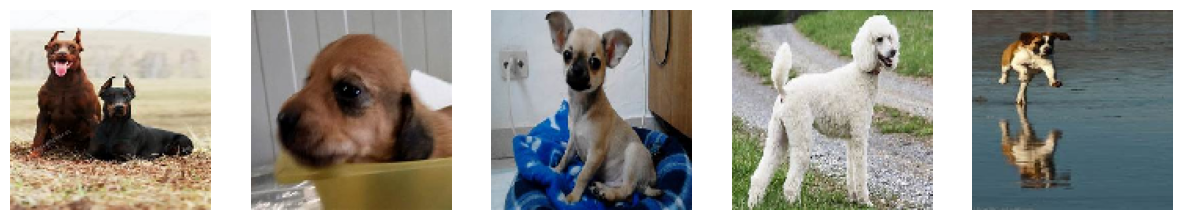

In [16]:
import matplotlib.pyplot as plt

# Get a batch of images
images, labels = next(train_generator)

# Display first 5 images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(images[i])
    axes[i].axis("off")
plt.show()

In [ ]:
#Convert the labels to one-hot encoded form.
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print("y_train shape after one-hot encoding:", y_train.shape)
print("y_test shape after one-hot encoding:", y_test.shape)


y_train shape after one-hot encoding: (50000, 10)
y_test shape after one-hot encoding: (10000, 10)


In [ ]:
#Normalize

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

print(x_train.shape)
print(x_test.shape)
print("Pixel value range:", x_train.min(), "to", x_train.max())


(50000, 32, 32, 3)
(10000, 32, 32, 3)
Pixel value range: 0.0 to 1.0


In [ ]:
Define model